In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
import main
import visuals
import seaborn as sns
import sys
import Metrica_EPV as mepv
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
from matplotlib import transforms
import matplotlib.ticker as mtick
import matplotlib.patheffects as path_effects
import pitch_mckeever
import matplotlib.font_manager
from ast import literal_eval

In [2]:
if __name__ == "__main__":
    driver = webdriver.Chrome('chromedriver.exe')
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://www.whoscored.com/Matches/1563891/Live/International-European-Championship-2020-Italy-Spain"
match_data = main.getMatchData(driver, url, close_window=False)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# Add xG data to events dataframe
events_df = main.getxGFromUnderstat(match_data, events_df, driver)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: International, League: European Championship, Season: 2020, Match Id: 1563891
Expected Goals data for league not available


In [3]:
EPV = mepv.load_EPV_grid('EPV_grid.csv')
events_df = main.to_metric_coordinates_from_whoscored(events_df)
events_df = main.addEpvToDataFrame(events_df,EPV)

In [4]:
hm = []
for i in range(len(events_df)):
    type_event = events_df['type'][i]['displayName']
    hm.append(type_event)

In [5]:
def unique(hm):
     
    # insert the list to the set
    list_set = set(hm)
    # convert the set to the list
    unique_list = (list(list_set))
    for x in unique_list:
        print(x)

In [6]:
#unique(hm)

## Shots

In [7]:
goal = events_df.loc[[row['displayName'] == 'Goal' for row in list(events_df['type'])]].reset_index(drop=True)
goal = goal[['minute','x','y','isShot','isGoal']]
goal = goal.replace({True:'Goal'})
shot = events_df.loc[[row['displayName'] == 'SavedShot' for row in list(events_df['type'])]].reset_index(drop=True)
shot = shot[['minute','x','y','isShot','isGoal']]
shot = shot.fillna('Saved')
miss_shot = events_df.loc[[row['displayName'] == 'MissedShots' for row in list(events_df['type'])]].reset_index(drop=True)
miss_shot = miss_shot[['minute','x','y','isShot','isGoal']]
miss_shot = miss_shot.fillna('Missed')
all_shots = goal.append([shot,miss_shot]).reset_index()
all_shots

,index,minute,x,y,isShot,isGoal
0,0,59,86.4,65.1,Goal,Goal
1,1,79,90.3,54.0,Goal,Goal
2,2,121,88.5,50.0,Goal,Goal
3,3,122,88.5,50.0,Goal,Goal
4,4,123,88.5,50.0,Goal,Goal
5,5,123,88.5,50.0,Goal,Goal
6,6,124,88.5,50.0,Goal,Goal
7,7,125,88.5,50.0,Goal,Goal
8,0,24,86.8,46.4,True,Saved
9,1,24,87.7,47.2,True,Saved


In [8]:
all_shots['isGoal'].unique()

array(['Goal', 'Saved', 'Missed'], dtype=object)

In [9]:
#background = "#6CADDF"
#white

#fig, ax = plt.subplots(figsize=(11, 7))
#fig.set_facecolor(background)

#pitch_mckeever.draw_pitch(orientation="vertical",
#           aspect="half",
#           pitch_color=background,
#           line_color="white",
#           ax=ax)


#home_goal = 0  
#home_shot_miss=0

#Plot the shots
#for i, shots in all_shots.iterrows():
    #all_shots['x'] = literal_eval(all_shots['x'])
    #all_shots['y'] = literal_eval(all_shots['y'])
#    x = all_shots['x']
#    y = all_shots['y']
    
    #Definisi goal dari dataset
#    goal = all_shots['isGoal'] == 'Goal'
#    goal = goal.all()
   
    #Ukuran circle tergantung xG
#    circlesize = np.sqrt(shots['shot_statsbomb_xg']*15)

#    if goal:
#            shotCircle = plt.Circle((y-5,x-15),15,color = '#EE3124') #pitchWidthY-  x-70,y+40
            #plt.text((x+1),pitchWidthY-y+4,shots['player'])
#            home_goal += 1
#    else:
#            shotCircle = plt.Circle((y-5,x-15),10,color='#EE3124')
#            shotCircle.set_alpha(.2)
#            home_shot_miss += 1
    
    #ax.add_patch(shotCircle)
    
#plt.title('Where All '+ team +"'s"+' Shots \n Came From Vs PSG',fontfamily="Source Sans Pro",fontsize=20,fontweight='bold',color='#00285E')
#plt.text(34,70,team,fontweight='bold',alpha=0.6,fontsize=28,ha='center', va='center',color='#00285E')
#plt.text(34,66,'Goal: '+ str(home_goal), fontweight='bold',alpha=0.3,fontsize=15,ha='center', va='center')
#plt.text(34,63.5,'Total Shots: '+ str(home_shot_miss),fontweight='bold',alpha=0.3,fontsize=15,ha='center', va='center')

#fig.set_size_inches(5,7)
#plt.xlim(59.6,121)
#plt.show()

#plt.tight_layout()
#plt.show()


In [10]:
#goal

In [11]:
end_x_y = events_df[events_df['endX'].notna()].reset_index()
end_x_y

,index,id,eventId,minute,second,teamId,x,y,expandedMinute,period,...,blockedY,cardType,isGoal,x_metrica,endX_metrica,y_metrica,endY_metrica,EPV_start,EPV_end,EPV_difference
0,2,2.309967e+09,3,0,0.0,338,49.9,50.0,0,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,NaN,-0.106,-17.596,0.000,4.284,0.0133,0.0107,-0.0026
1,3,2.309967e+09,4,0,2.0,338,35.2,57.0,0,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,NaN,-15.688,24.380,4.760,-31.688,0.0112,0.0229,0.0117
2,5,2.309967e+09,4,0,17.0,343,27.1,100.0,0,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,NaN,-24.274,-10.176,34.000,29.648,0.0072,0.0101,0.0029
3,6,2.309967e+09,5,0,18.0,343,40.4,93.6,0,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,NaN,-10.176,11.130,29.648,25.636,NaN,NaN,NaN
4,8,2.309967e+09,8,0,22.0,338,33.4,15.0,0,"{'value': 1, 'displayName': 'FirstHalf'}",...,NaN,NaN,NaN,-17.596,-37.630,-23.800,-4.556,0.0092,0.0083,-0.0009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,2013,2.309972e+09,819,119,3.0,343,23.0,50.9,123,"{'value': 4, 'displayName': 'SecondPeriodOfExt...",...,NaN,NaN,NaN,-28.620,-19.504,0.612,6.324,NaN,NaN,NaN
1419,2014,2.309972e+09,1359,119,6.0,338,71.0,29.2,123,"{'value': 4, 'displayName': 'SecondPeriodOfExt...",...,NaN,NaN,NaN,22.260,53.000,-14.144,-17.952,NaN,NaN,NaN
1420,2015,2.309972e+09,821,119,40.0,343,3.9,60.8,123,"{'value': 4, 'displayName': 'SecondPeriodOfExt...",...,NaN,NaN,NaN,-48.866,6.042,7.344,31.688,NaN,NaN,NaN
1421,2018,2.309972e+09,1362,119,43.0,338,46.4,4.3,123,"{'value': 4, 'displayName': 'SecondPeriodOfExt...",...,NaN,NaN,NaN,-3.816,1.060,-31.076,-34.000,NaN,NaN,NaN


In [12]:
end_xy = []
for i in range(len(end_x_y)):
    type_event =end_x_y['type'][i]['displayName']
    end_xy.append(type_event)

In [13]:
unique(end_xy)

Clearance
Punch
OffsidePass
Pass


In [14]:
epv = events_df[events_df['EPV_start'].notna()].reset_index()
unique_epv = []
for i in range(len(epv)):
    type_event =epv['type'][i]['displayName']
    unique_epv.append(type_event)
unique(unique_epv)

Pass


In [15]:
# Team data
team = 'Italy'
teamId = match_data['home']['teamId']
opponent = 'Spain'
venue = 'home'

# Get Player Names
team_players_dict = {}
for player in matches_df[venue][match_data['matchId']]['players']:
    team_players_dict[player['playerId']] = player['name'] 
    
# Total Passes
passes_df = events_df.loc[[row['displayName'] == 'Pass' for row in list(events_df['type'])]].reset_index(drop=True)
passes_df = passes_df.loc[[row['displayName'] == 'Successful' for row in list(passes_df['outcomeType'])]].reset_index(drop=True)
passes_df = passes_df.loc[passes_df['teamId'] == teamId].reset_index(drop=True)
passes_df.insert(27, column='playerName', value=[team_players_dict[i] for i in list(passes_df['playerId'])])

passes_df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,blockedY,cardType,isGoal,x_metrica,endX_metrica,y_metrica,endY_metrica,EPV_start,EPV_end,EPV_difference
0,2.309967e+09,4,0,17.0,343,27.1,100.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-24.274,-10.176,34.000,29.648,0.0072,0.0101,0.0029
1,2.309967e+09,9,1,12.0,343,59.4,25.6,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,9.964,16.854,-16.592,-23.596,0.0171,0.0186,0.0015
2,2.309967e+09,12,1,24.0,343,34.0,68.0,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-16.960,-22.472,12.240,18.020,0.0103,0.0090,-0.0013
3,2.309967e+09,13,1,25.0,343,24.6,74.4,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-26.924,-41.340,16.592,2.176,0.0085,0.0081,-0.0004
4,2.309967e+09,14,1,28.0,343,12.5,53.9,1,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-39.750,-24.592,2.652,-25.024,0.0084,0.0080,-0.0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,2.309972e+09,799,116,21.0,343,4.4,40.7,120,"{'value': 4, 'displayName': 'SecondPeriodOfExt...","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-48.336,-49.502,-6.324,4.080,0.0072,0.0080,0.0008
312,2.309972e+09,800,116,26.0,343,4.1,54.3,120,"{'value': 4, 'displayName': 'SecondPeriodOfExt...","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-48.654,-5.300,2.924,3.264,0.0075,0.0136,0.0061
313,2.309972e+09,803,116,35.0,343,34.4,6.8,120,"{'value': 4, 'displayName': 'SecondPeriodOfExt...","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,-16.536,6.254,-29.376,-28.016,0.0090,0.0135,0.0045
314,2.309972e+09,806,116,50.0,343,57.8,0.0,120,"{'value': 4, 'displayName': 'SecondPeriodOfExt...","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,8.268,14.840,-34.000,-27.336,0.0135,0.0170,0.0035


In [16]:
passes_df['x'] = passes_df['x']*1.2
passes_df['y'] = passes_df['y']*.8
passes_df['endX'] = passes_df['endX']*1.2
passes_df['endY'] = passes_df['endY']*.8

In [17]:
#hex city: #6CADDF

In [18]:
passes_df['count'] = 1

In [19]:
pass_player = passes_df.groupby(['playerName'])['count'].agg('sum').reset_index().sort_values(by='count',ascending=False)
pass_player

,playerName,count
6,Giorgio Chiellini,46
9,Leonardo Bonucci,37
7,Giovanni Di Lorenzo,36
5,Gianluigi Donnarumma,34
8,Jorginho,26
3,Emerson,25
10,Lorenzo Insigne,23
12,Marco Verratti,23
14,Nicolò Barella,15
15,Rafael Tolói,13


In [20]:
city_player = pass_player['playerName'].unique()

In [21]:
city_player

array(['Giorgio Chiellini', 'Leonardo Bonucci', 'Giovanni Di Lorenzo',
       'Gianluigi Donnarumma', 'Jorginho', 'Emerson', 'Lorenzo Insigne',
       'Marco Verratti', 'Nicolò Barella', 'Rafael Tolói',
       'Federico Chiesa', 'Domenico Berardi', 'Ciro Immobile',
       'Matteo Pessina', 'Manuel Locatelli', 'Andrea Belotti'],
      dtype=object)

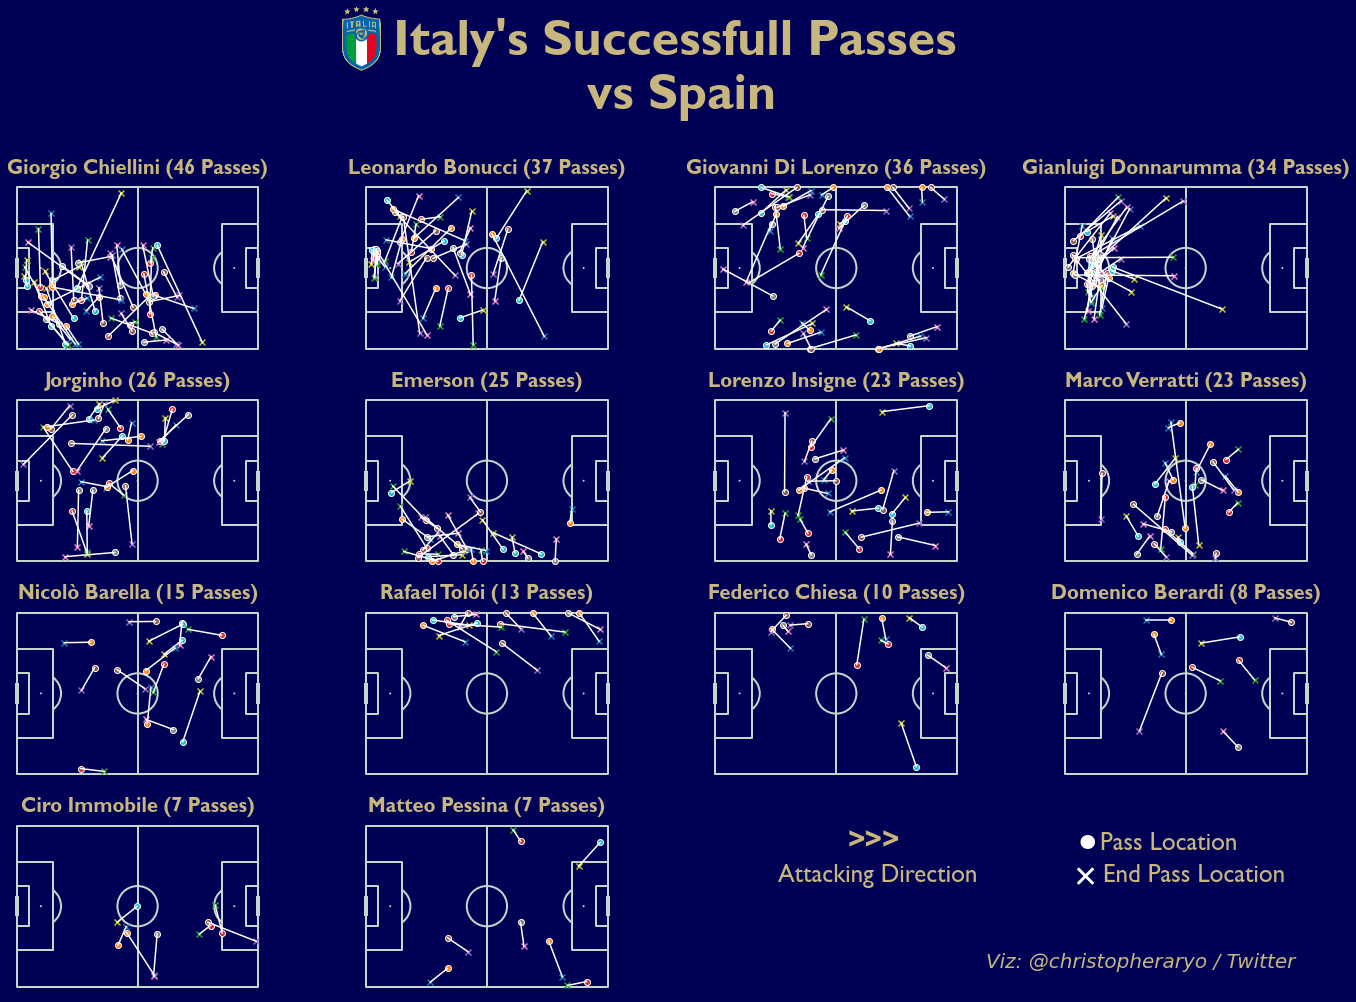

In [22]:
fig ,ax = plt.subplots(4,4,figsize=(24,15))
background = '#000055'
color_line = '#ffffff'
fig.set_facecolor(background)
ax.flat[-2].set_visible(False)
ax.flat[-1].set_visible(False)

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color=background, line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

for i,ax in enumerate(fig.axes):
    try:
        ax.set_facecolor(background)
        pitch.draw(ax=ax)
        pass_viz = passes_df[passes_df.playerName==city_player[i]].reset_index()
        total_pass = len(pass_viz)
        for x in range(len(pass_viz['x'])):
            ax.plot((pass_viz['x'][x],pass_viz['endX'][x]),(pass_viz['y'][x],pass_viz['endY'][x]),color=color_line)
            ax.scatter(pass_viz['endX'][x],pass_viz['endY'][x],edgecolors='red',marker='x')
            ax.scatter(pass_viz['x'][x],pass_viz['y'][x],edgecolors=color_line)
            ax.set_title("%s (%s Passes)"%(city_player[i],total_pass), loc='center', fontsize=20, fontweight='bold', color='#c8b67f',fontfamily='Gill Sans MT')
    
    except:
        pass

fig.text(0.75,0.25,'•',size=50,color=color_line)
fig.text(0.75,0.225,'✕',size=30,color=color_line)
fig.text(0.766,0.26,'Pass Location',size=25,color = '#c8b67f',fontfamily='Gill Sans MT')
fig.text(0.768,0.23,'End Pass Location',size=25,color = '#c8b67f',fontfamily='Gill Sans MT')
fig.text(0.62,0.26,'>>>',size=30,color = '#c8b67f',fontfamily='Gill Sans MT',fontweight='bold')
fig.text(0.58,0.23,'Attacking Direction',size=25,color = '#c8b67f',fontfamily='Gill Sans MT')
plt.ylim(1.2)

im = plt.imread('italy_logo.png')

newax = fig.add_axes([0.29, 0.98, 0.06, 0.06], anchor='NE', zorder=-1)
newax.imshow(im)
newax.axis('off')


fig.text(0.7,0.15,'Viz: @christopheraryo / Twitter',fontstyle='italic',size=20,color='#c8b67f')
plt.suptitle("Italy's Successfull Passes\n vs Spain", fontsize=50, fontweight='bold', color='#c8b67f', x = 0.52 ,y=1.03,fontfamily='Gill Sans MT')
plt.savefig('Italy.png')